# Analyse de Fourier

## Quelques rappels de théorie du signal

Pour un signal à temps continu $s(t)$ on peut définir son spectre en fréquence par la relation
$$S(f)=\int_{-\infty}^{+\infty}s(t)\exp(i2\pi ft)dt$$
Cette relation définit la transformée de Fourier directe.

Cette relation est inversible, il est donc possible de reconstruire le signal $s(t)$ à partir de son spectre $S(f)$ par la relation
$$s(t)=\int_{-\infty}^{+\infty}S(f)\exp(-i2\pi ft)df$$
Cette relation définit la transformée de Fourier inverse.

Cette relation permet d'interpréter le signal $s(t)$ comme une superposition de composantes monochromatiques dans tout le spectre des fréquences, chaque fréquence étant pondérée par un coefficient à valeur complexe spécifique du signal considéré.

Lorsque l'on passe dans le domaine discret, on échantillonne notre signal $s(t)$ avec une fréquence d'échantillonnage $f_e$, ce qui revient par équivalence à un pas temporel entre deux échantillons successifs $\delta t=1/f_e$. Vous avez vu en cours sur la théorie du signal à quelles conditions il était possible d'échantillonner un signal physique, nous ne reviendrons pas ici sur ce point.

On va donc remplacer le signal à temps continu $s(t)$ par une série de valeurs discrètes $s[j]\equiv s(j\delta t)$. Ici on conserve la même notation pour le signal à temps continu et sa représentation discrète. De la même manière le spectre est échantillonné avec un pas fréquentiel $\delta f$, on va donc remplacer $S(f)$ par une série de valeurs discrètes $S[k]\equiv S(k\delta f)$. A nouveau on ne différencie pas les notations entre la représentation continue et la représentation discrète du spectre.

Si l'on considère un signal temporel échantillonné sur $N$ points, on va calculer son spectre également échantillonné sur $N$ points. Dans le domaine fréquentiel on va faire en sorte de couvrir le domaine $[0,f_{max}]$, avec $f_{max}$ la fréquence maximale d'échantillonnage dans l'espace dual des fréquences.

En réalité notre spectre correspond à des valeurs positives et négatives des fréquences, le domaine des fréquences couvre donc l'intervalle $[-f_{max},f_{max}]$.
D'après le théorème de l'échantillonnage de Shannon, on sait que l'on peut échantillonner un signal à une fréquence d'échantillonnage $f_e$ que si cette fréquence est au moins égale à deux fois la plus grande fréquence contenue dans le signal. Il est donc légitime et logique que le paramètre $f_{max}$ utilisé pour l'échantillonnage du spectre dans l'espace des fréquences ne soit autre que $f_e/2$.

Ainsi le spectre est échantillonné dans l'intervalle $[-f_e/2,+f_e/2]$ sur $N$ points, avec $N/2$ valeurs correspondant aux fréquences positives, et $N/2$ valeurs aux fréquences négatives. On a ainsi
$$\frac{N}{2}\delta f=\frac{f_e}{2}=\frac{1}{2\delta t}$$

On en déduit ainsi la relation entre les pas d'échantillonnages temporel $\delta t$ et fréquentiel $\delta f$ sous la forme
$$\delta t\times\delta f=\frac{1}{N}$$

Les transformées de Fourier directe et inverse, écrites avec des signaux discrets, se présentent sous la forme
$$S[k]=\sum_{j=0}^{N-1}s[j]\exp\left(\frac{i2\pi jk}{N}\right)
~~~~~/~~~~~
s[j]=\frac{1}{N}\sum_{k=0}^{N-1}S[k]\exp\left(-\frac{i2\pi jk}{N}\right)
$$

## Simulation d'une impulsion à enveloppe gaussienne

La première étape consiste à simuler une impulsion sous la forme d'une composante monofréquence à la fréquence $f_c$ modulée par une enveloppe gaussienne de coefficient $\alpha$. Les paramètres à prendre en compte dans cette simulation sont
- la fréquence centrale $f_c$,
- la bande passante relative, en % de $f_c$,
- la fréquence d'échantillonnage $f_e$,
- le nombre de points d'échantillonnage $N$.
On fera en sorte que l'impulsion soit centrée dans la fenêtre temporelle considérée.

Ecrire la fonction permettant de simuler cette impulsion. Représenter graphiquement le signal temporel ainsi obtenu. On pourra prendre les valeurs suivantes
- fréquence centrale 1 MHz,
- bande passante relative de 100%,
- échantillonnage à une fréquence de 20 MHz.

On veillera à choisir un nombre de points $N$ suffisant pour avoir une bonne représentation du signal temporel.


### Un peu de maths ...

La composante principale est monofréquence à la fréquence $f_c$, on peut ainsi par exemple l'écrire sous la forme $\sin(2\pi f_ct)$. Au niveau de son spectre, on a alors deux distributions $\delta$, l'une à la fréquence $f_c$ et l'autre à la fréquence symétrique $-f_c$.

On multiplie ce signal par une enveloppe gaussienne de la forme $e^{-\alpha t^2}$ ; le spectre correspondant est également gaussien de la forme $e^{-\pi^2f^2/\alpha}$. 

Le spectre final résulte de la convolution de notre spectre gaussien par les deux distributions $\delta$, ce qui nous fait deux répliques du spectre gaussien initial, centrées en $f_c$ et $-f_c$.

On note $bw$ la bande passante relative voulue. La largeur à mi-hauteur de ce spectre gaussien est alors donnée par
$$e^{-\pi^2 (w/2)^2/\alpha}=1/2
\mathrm{~~~~~avec~~~~~} \frac{w}{2}=bw\times f_c
$$
ce qui nous permet de calculer $\alpha$ sous la forme
$$
\alpha=\frac{\pi}{\ln(2)}\left(\frac{bw \times f_c}{2}\right)^2
$$


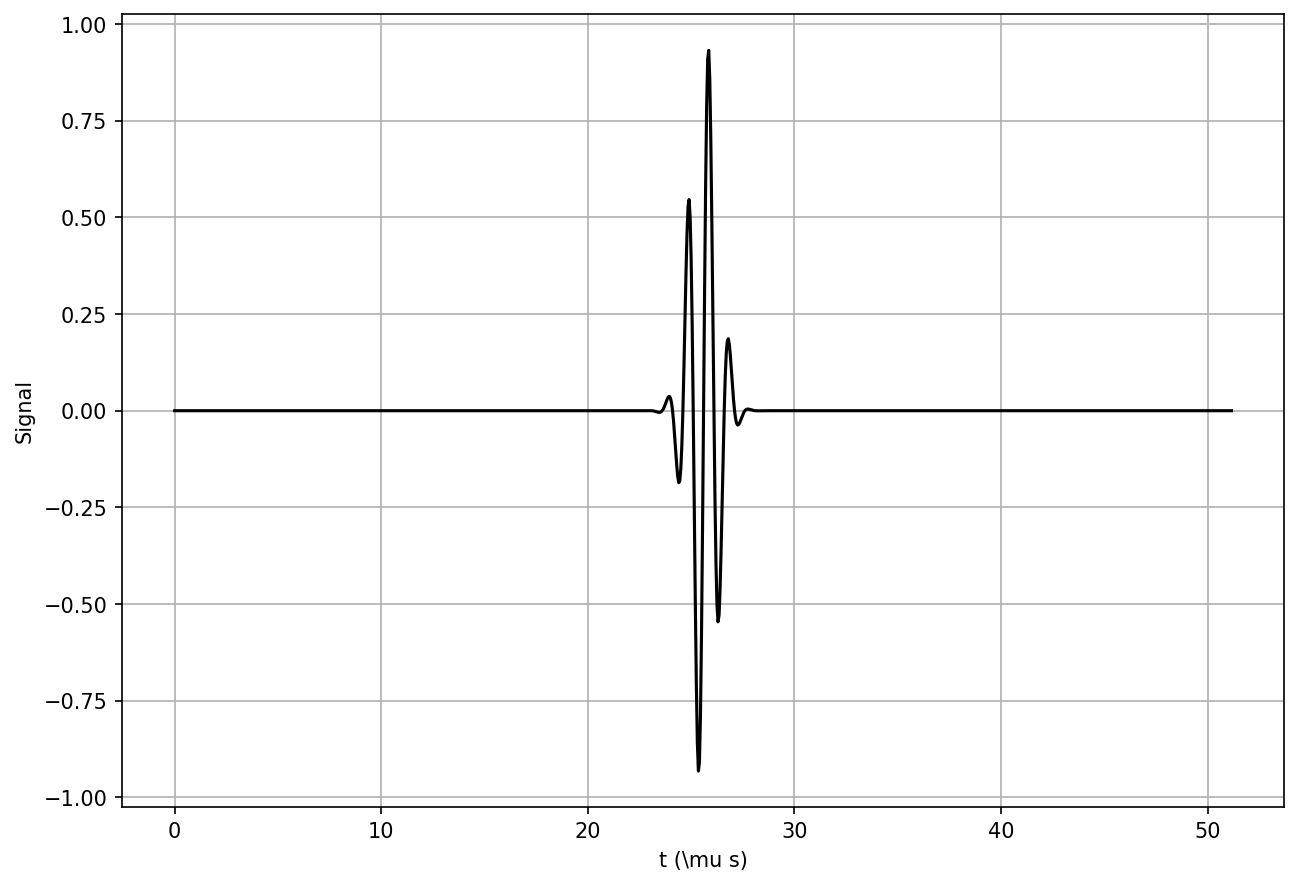

In [35]:
import matplotlib.pyplot as plt
import numpy as np

fc = 1 #MHz
BP = 1 #100%
fe = 20 #MHz
N =  1024

dt = 1/(fe)
df = 1/(N*dt)

t = np.linspace(0, dt*(N-1), N)

alpha = (np.pi*(BP*fc/2)**2)/np.log(2)
tm = t[N//2]

s1 = np.exp(-alpha*(t-tm)**2)
s2 = np.sin(2*np.pi*fc*(t-tm))
s = s1*s2

plt.figure(figsize=(10, 7), dpi=150)
plt.plot(t,s, color='black')
plt.grid('minor')
plt.xlabel('t (\mu s)')
plt.ylabel('Signal')
plt.show()


## Calcul de la transformée de Fourier discrète

A partir du signal précédemment simulé, calculer la transformée de Fourier discrète correspondante à partir de la formule ci-dessus. Représenter graphiquement les modules et phases du spectre ainsi obtenu.

Quelle est la complexité numérique de ce calcul en fonction du nombre de points $N$ ?


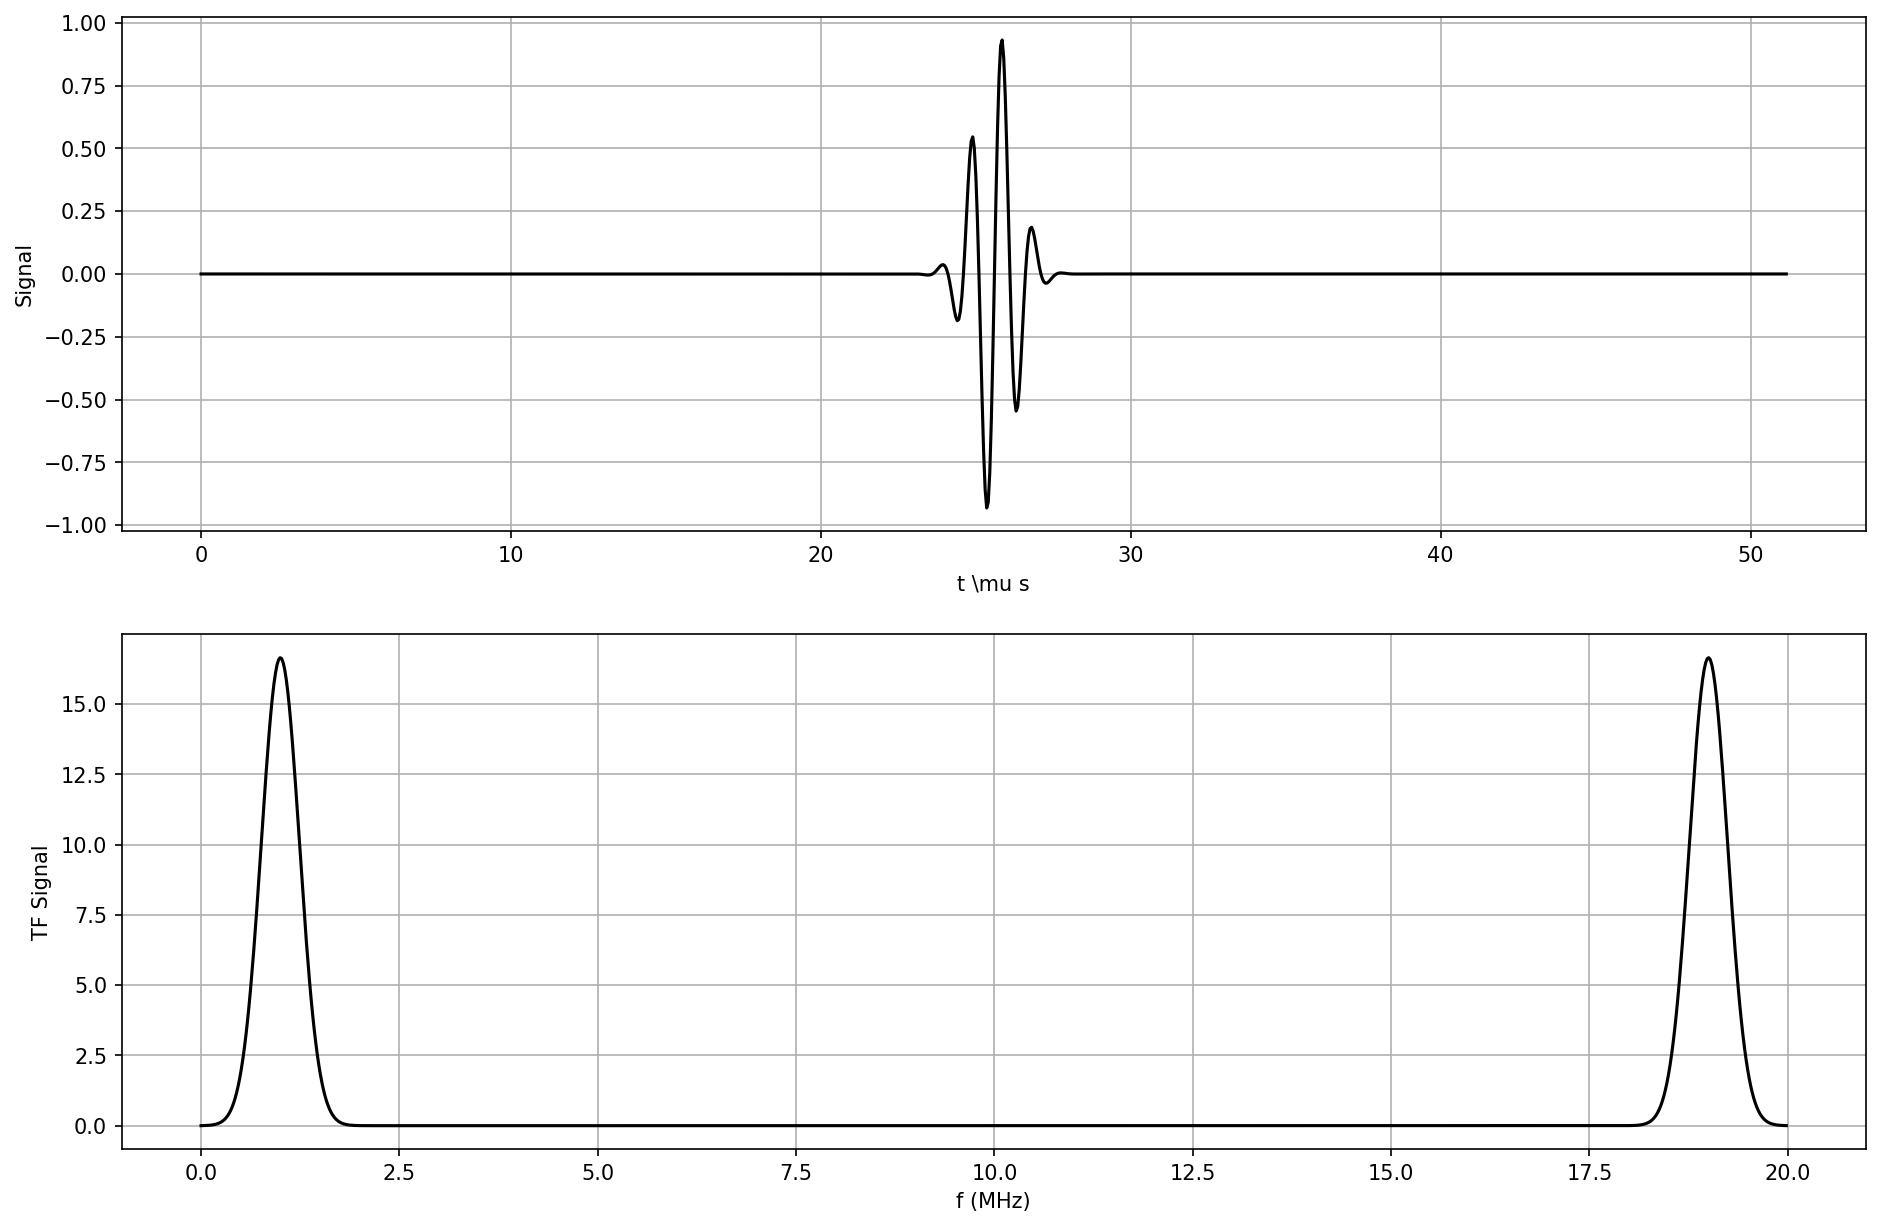

In [36]:

def TFlong(N,s) :

    S = [0 for i in range(N)]

    for k in range(N) :
        #rint(k)
        for i in range(N) :
            S[k] += s[i]*np.exp(1j*2*np.pi*i*k/N)
    
    return S

S = TFlong(N,s)

f = np.linspace(0, df*(N-1), N)    
    
plt.figure(figsize=(15, 10), dpi=150)
plt.subplot(2,1,1)
plt.plot(t,s,'k')
plt.grid('minor')
plt.xlabel('t \mu s')
plt.ylabel('Signal')

plt.subplot(2,1,2)
plt.plot(f,np.abs(S),'k')
plt.grid('minor')
plt.xlabel('f (MHz)')
plt.ylabel('TF Signal')

plt.show()


A partir du signal et du spectre précédents, calculer 
$$\sum_{j=0}^{N-1}|s[j]|^2
\mathrm{~~~~~et~~~~~}
\sum_{k=0}^{N-1}|S[k]|^2$$


In [30]:

energy_s = np.sum(np.abs(s)**2)
energy_S= np.sum(np.abs(S)**2)
print("somme s: ",energy_s,"somme S: ", energy_S, "somme S/ somme s", energy_S/energy_s)

somme s:  11.774099905104075 somme S:  6028.339151413478 somme S/ somme s 512.0000000000163


Refaire les mêmes calculs avec un signal à valeurs aléatoires entre $-1$ et $+1$ et son spectre. Commentaires ?

## La transformée de Fourier rapide - 1ère approche

On a vu précédemment que le calcul de la transformée de Fourier discrète était de complexité quadratique en le nombre de points $N$, ce qui peut rapidement être assez pénalisant en temps de calcul si le code doit évaluer un grand nombre de transformées de Fourier directes ou inverses. Il est donc important de pouvoir disposer d'une approche numérique plus efficace en temps de calcul.

La première approche consiste à supposer que le nombre de points $N$ peut se décomposer comme le produit de deux entiers $n_1$ et $n_2$ : $N=n_1n_2$. On pose $w=e^{i2\pi/N}$ de sorte que la transformée de Fourier discrète peut être réécrite sous la forme
$$S[k]=\sum_{j=0}^{N-1}s[j]w^{jk}$$
On notera que l'on a $w^N=1$.

Par division euclidienne de $j$ par $n_2$ on peut écrire
$$j=j_1n_2+j_0,~0\leq j_1<n_1,~0\leq j_0<n_2$$
Ainsi l'indice temporel peut de manière équivalente être représenté par $j$ ou par $(j_1,j_0)$.

De la même manière on fait la division euclidienne de $k$ par $n_1$ et on écrit
$$k=k_1n_1+k_0,~0\leq k_1<n_2,~0\leq k_0<n_1$$
Ainsi l'indice fréquentiel peut de manière équivalente être représenté par $k$ ou par $(k_1,k_0)$. 

Moyennant ces deux divisions euclidiennes, on a
$$jk=(j_1n_2+j_0)\times(k_1n_1+k_0)=j_1k_1n_1n_2+j_1k_0n_2+k_1n_1j_0+j_0k_0=j_1k_1N+j_1k_0n_2+j_0k$$

On peut alors en déduire
$$w^{jk}=w^{j_1k_1N}w^{j_1k_0n_2}w^{j_0k}=w^{j_1k_0n_2}w^{j_0k}
$$

On peut alors reporter l'expression de $w^{jk}$ dans l'expression de la transformée de Fourier discrète
$$S[k_1n_1+k_0]=\sum_{j_0,j_1}s[j_1n_2+j_0]w^{j_1k_0n_2}w^{j_0k}=\sum_{j_0}w^{j_0k}\sum_{j_1}s[j_1n_2+j_0]w^{j_1k_0n_2}
$$

On introduit le tableau intermédiaire
$$s_1[k_0n_2+j_0]=\sum_{j_1=0}^{n_1}s[j_1n_2+j_0]w^{j_1k_0n_2},~0\leq k_0<n_1,~0\leq j_0<n_2
$$

Compte tenu des valeurs possibles pour $j_0$ et $k_0$, on peut aisément vérifier que le tableau intermédiaire $s_1$ est de longueur $N$. Une fois ce tableau intermédiaire calculé, il reste à évaluer
$$S[k_1n_1+k_0]=\sum_{j_0=0}^{n_2}s_1[k_0n_2+j_0]w^{j_0k},~0\leq k_0<n_1,~0\leq k_1<n_2
$$

En terme de complexité numérique, le calcul de $s_1$ nous coûte
- $n_1$ calculs (somme sur $j_1$) pour un terme particulier de $s_1$,
- et donc globalement $n_1N$ opérations.

Une fois $s_1$ calculé, le calcul de $S$ nous coûte
- $n_2$ calculs (somme sur $j_0$) pour un terme particulier de $S$,
- et donc globalement $n_2N$ opérations.

Ces deux étapes du calcul étant à réaliser séquentiellement, le coût total s'évalue comme $N(n_1+n_2)$ opérations, que l'on peut comparer aux $N^2$ opérations nécessaires avec l'approche initiale.

On peut aisément vérifier que $N(n_1+n_2)$ est minimal si $n_1$ et $n_2$ ont des valeurs similaires, ce qui sera aisé à réaliser si le nombre de points $N$ est un carré.

A titre d'exemple, $N=1024=32\times32$ :
- l'algorithme initial nous coûte $N^2$ opérations, soit 1048576,
- l'algorithme décrit ici nous coûte $N(n_1+n_2)$ opérations, soit 65536,
- soit un rapport 16 !



Implémenter cette seconde méthode de calcul, vérifier que vous obtenez le même spectre qu'avec l'approche initiale.

Pour $n$ variant entre 10 et 40 :
- calculer le signal précédent échantillonné sur $n^2$ points,
- calculer la transformée de Fourier discrète approche initiale, évaluer le temps de calcul nécessaire,
- calculer la transformée de Fourier discrète deuxième approche, évaluer le temps de calcul nécessaire,
- représenter graphiquement l'évolution de ces deux temps de calcul en fonction de $n$.


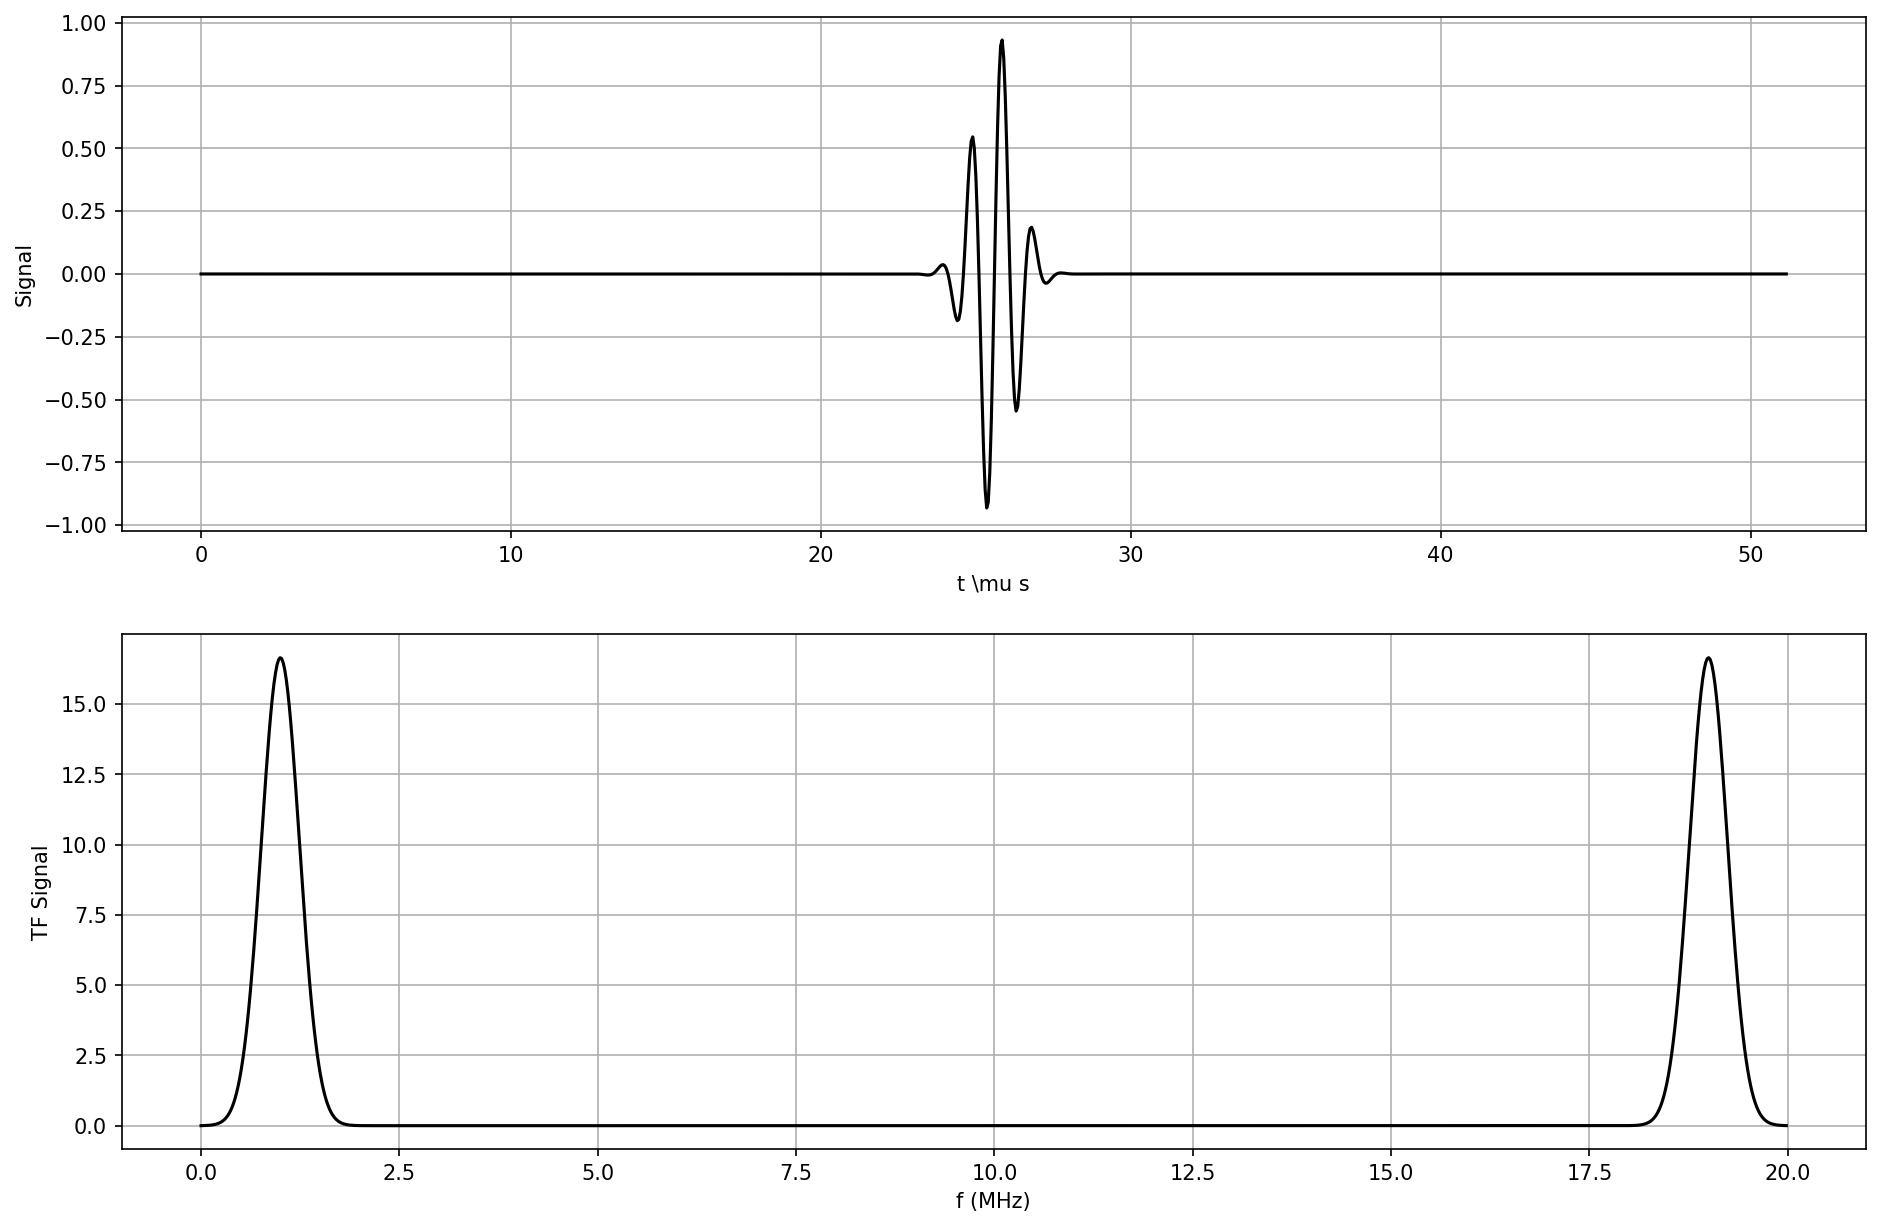

In [40]:
def TFcourt(n,s) :
    
    N = n**2
    S = np.zeros(N,dtype = complex)
    s1 = np.zeros(N,dtype = complex)
    
    w = np.exp(2*np.pi*1j/N)
    
    for k0 in range(n) :
        for j1 in range(n) :
            for j0 in range(n) :
                if (j1*n+j0 < N) and (k0*n + j0 <N) :
                    s1[k0*n + j0] += s[j1*n+j0]*w**(j1*k0*n)
    
    for k0 in range(n) :
        for k1 in range(n) :
            for j0 in range(n) :
                if (k1*n+k0 < N) and (k0*n+j0 < N) :
                    S[k1*n+k0] += s1[k0*n+j0]*w**(j0*(k1*n+k0))
    
    return S

n = 32
N = n**2
Slong = TFlong(N,s)
Scourt = TFcourt(n,s)

f = np.linspace(0, df*(N-1), N)    
    
plt.figure(figsize=(15, 10), dpi=150)
plt.subplot(2,1,1)
plt.plot(t,s,'k')
plt.grid('minor')
plt.xlabel('t \mu s')
plt.ylabel('Signal')

plt.subplot(2,1,2)
plt.plot(f,np.abs(S),'k')
plt.grid('minor')
plt.xlabel('f (MHz)')
plt.ylabel('TF Signal')

plt.show()



## La transformée de Fourier rapide - la méthode de Cooley-Tukey

La méthode de Cooley-Tukey consiste à généraliser l'approche précédente pour un nombre de points $N$ qui est une puissance de 2, par application de la même méthode de manière récursive. Cette méthode date de 1965, année de publication de l'article de référence sur ce sujet, même si en réalité l'algorithme avait déjà été envisagé bien avant (1805) par Carl Friedrich Gauss.

Depuis, de nombreuses variantes ont été formalisées, permettant de bénéficier de la même logique algorithmique pour des nombres de points qui ne sont pas des puissances de 2.

Python dispose d'un module de calcul de la transformée de Fourier rapide qui implémente ce genre d'approche numérique, on le trouve sous la dénomination numpy.fft.fft.

Utiliser cette fonction pour recalculer le spectre du signal précédent, vérifiez que vous obtenez bien les mêmes résultats.


Evaluer le temps de calcul nécessaire pour le calcul de la transformée de Fourier rapide d'un signal comportant
- 1048573 points
- 1048576 points
- 1048583 points

Quelles remarques pouvez-vous faire ?

## Calcul de convolution

Dans le domaine du traitement du signal, la convolution est une opération très fréquente. Elle revient à calculer le signal $s(t)$ sous la forme
$$s(t)=e(t)\frac{\ast}{t}h(t)=\int_{-\infty}^{+\infty}e(\tau)h(t-\tau)d\tau
$$

Physiquement cette opération intervient dans tous les systèmes linéaires et invariants par translation. Ici $h(t)$ est la réponse impulsionnelle de notre système (sa fonction temporelle de réponse à une impulsion de Dirac en entrée), $e(t)$ est le signal physique injecté en entrée du système et $s(t)$ est la mesure correspondante en sortie.

A titre d'exemple notre système physique peut être un haut-parleur, $e(t)$ serait le signal électrique envoyé par les câbles ; ce signal électrique fait vibrer mécaniquement la membrane du haut-parleur, et cette vibration produit une onde sonore qui se propage dans le volume. Dans un tel exemple $s(t)$ peut par exemple représenter la musique que vous percevez au niveau de vos oreilles (en réalité la partie perception n'est pas vraiment linéaire ...).

On peut montrer que, par transformation de Fourier appliquée à l'équation de convolution, on a une relation très simple entre les spectres :
$$S(f)=E(f)\times H(f)$$

Ici $E(f)$ et $S(f)$ sont les spectres des signaux d'entrée $e(t)$ et $s(t)$, et $H(f)$ est la transformée de Fourier de la réponse impulsionnelle $h(t)$, autrement nommée fonction de transfert.

Ecrire un programme permettant de calculer une convolution de manière rapide.
On pourra appliquer ce programme à l'impulsion précédemment utilisée, convoluée par une fonction porte dont on pourra faire varier la largeur. Etudier l'influence de la largeur de la porte sur la forme finale du signal obtenu.
